In [74]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from model.fgn import fractional_gaussian_covariance_series

class FBm():

    def generate_gaussian_fBm(self, H1: float, H2: float, corr:float, size: int, drifts: list = [0.0, 0.0]) -> np.ndarray:

        means = np.zeros(2*size)     
        means[0:size] = means[0:size] + drifts[0]
        means[size:] = means[size:] + drifts[1]
                         
        result = np.random.multivariate_normal(means, 
                                               fractional_gaussian_covariance_series(size, H1, H2, corr))
        ts = np.ndarray((2, size))
        ts[0] = result[0:size]
        ts[1] = result[size:]

        return np.cumsum(np.insert(ts, 0, 0, axis=1), axis=1) 

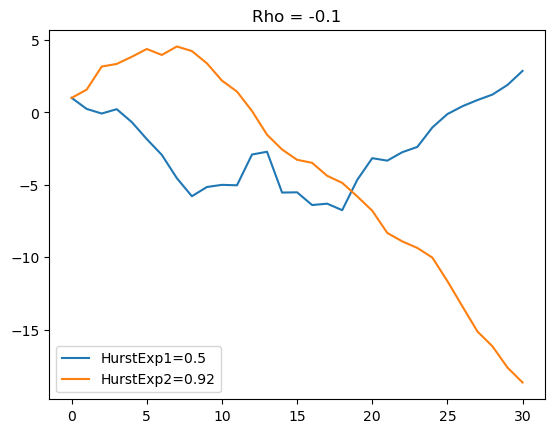

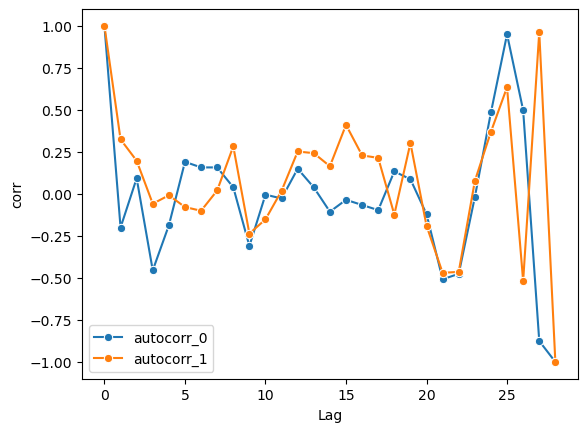

In [75]:
fbm = FBm()
size = 30
H1 = 0.5
H2 = 0.92
rho = -0.1
constant = 1  

fBms = fbm.generate_gaussian_fBm(H1, H2, rho, size, [0.0, 0.0]) 
ts = fBms + constant
                                          
plt.plot(ts[0], label=f"HurstExp1={H1}")
plt.plot(ts[1], label=f"HurstExp2={H2}")
plt.title(f"Rho = {rho}")
plt.legend()
plt.show()

autocorr_df = pd.DataFrame()
autocorr_df['decay_0'] = np.diff(ts[0])
autocorr_df['decay_1'] = np.diff(ts[1])
decay_func = lambda S, _range: [S.apply(abs).autocorr(lag=Lag) for Lag in _range]

sns.lineplot(data=decay_func(autocorr_df['decay_0'], range(0, size)), label='autocorr_0', marker='o')
sns.lineplot(data=decay_func(autocorr_df['decay_1'], range(0, size)), label='autocorr_1', marker='o')
plt.xlabel('Lag')
plt.ylabel('corr')
plt.show()